<a href="https://colab.research.google.com/github/bhardwajshivam/Expectation-Maximization/blob/main/Expectation_Maximization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

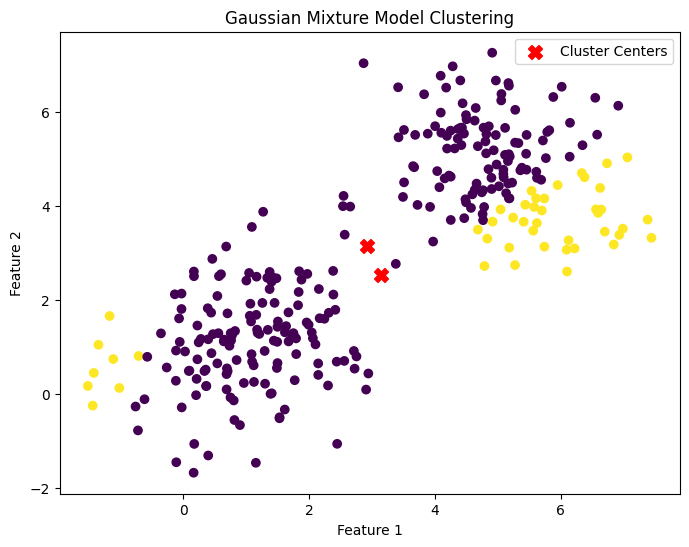

Cluster means: [[2.92118774 3.15204211]
 [3.14539449 2.52431158]]
Cluster covariances: [array([[4.19925603, 3.91911027],
       [3.91911027, 5.25946924]]), array([[6.71390952, 3.57838501],
       [3.57838501, 2.82236148]])]


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generating synthetic data
np.random.seed(0)
n_samples = 300
n_features = 2
n_components = 2

# Creating a synthetic dataset with two clusters
mean1 = np.array([1.0, 1.0])
cov1 = np.array([[1.0, 0.2], [0.2, 1.0]])
data1 = np.random.multivariate_normal(mean1, cov1, n_samples // 2)

mean2 = np.array([5.0, 5.0])
cov2 = np.array([[1.0, -0.2], [-0.2, 1.0]])
data2 = np.random.multivariate_normal(mean2, cov2, n_samples // 2)

X = np.concatenate([data1, data2])

# Define GMM parameters
n_iterations = 100
tolerance = 1e-4

# Helper function to calculate the multivariate normal PDF
def multivariate_normal(x, mean, cov):
    n = mean.shape[0]
    det = np.linalg.det(cov)
    inv = np.linalg.inv(cov)
    exponent = -0.5 * np.dot(np.dot((x - mean).T, inv), (x - mean))
    return (1.0 / ((2 * np.pi) ** (n / 2) * det ** 0.5)) * np.exp(exponent)

# Initializing GMM parameters
initial_means = np.random.rand(n_components, n_features)
initial_covs = [np.cov(X.T) for _ in range(n_components)]
initial_weights = np.ones(n_components) / n_components

# Expectation-Maximization (EM) algorithm
for iteration in range(n_iterations):
    # E-step: Calculating responsibilities
    responsibilities = np.zeros((n_samples, n_components))
    for i in range(n_samples):
        for j in range(n_components):
            responsibilities[i][j] = initial_weights[j] * multivariate_normal(X[i], initial_means[j], initial_covs[j])
        responsibilities[i] /= sum(responsibilities[i])

    # M-step: Updating parameters
    new_weights = np.mean(responsibilities, axis=0)
    new_means = np.dot(responsibilities.T, X) / np.sum(responsibilities, axis=0)[:, np.newaxis]
    new_covs = [np.dot((responsibilities[:, j][:, np.newaxis] * (X - new_means[j])).T, (X - new_means[j])) / np.sum(responsibilities[:, j]) for j in range(n_components)]

    # Checking for convergence
    if np.allclose(new_means, initial_means, rtol=tolerance) and np.allclose(new_covs, initial_covs, rtol=tolerance) and np.allclose(new_weights, initial_weights, rtol=tolerance):
        break

    initial_means = new_means
    initial_covs = new_covs
    initial_weights = new_weights

labels = np.argmax(responsibilities, axis=1)
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(initial_means[:, 0], initial_means[:, 1], c='red', s=100, marker='X', label='Cluster Centers')
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

print("Cluster means:", initial_means)
print("Cluster covariances:", initial_covs)
